# Peaks2MapsKernel demo

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from nilearn.plotting import plot_glass_brain

import nimare
from nimare.tests.utils import get_test_data_path

/Users/tsalo/.local/lib/python3.6/site-packages/scikit_learn-0.21.2-py3.6-macosx-10.7-x86_64.egg/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
dset_file = os.path.join(get_test_data_path(), 'nidm_pain_dset.json')
dset = nimare.dataset.Dataset(dset_file)

In [3]:
k = nimare.meta.cbma.kernel.Peaks2MapsKernel()
imgs = k.transform(dset, masked=True)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tsalo/anaconda/envs/python3/lib/python3

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/nilearn/plotting/displays.py:591: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


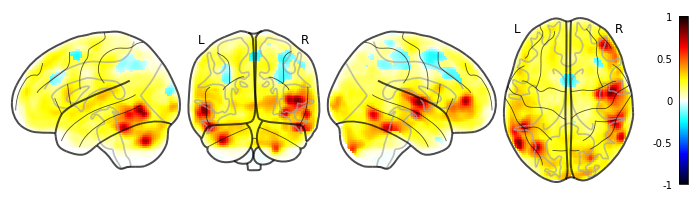

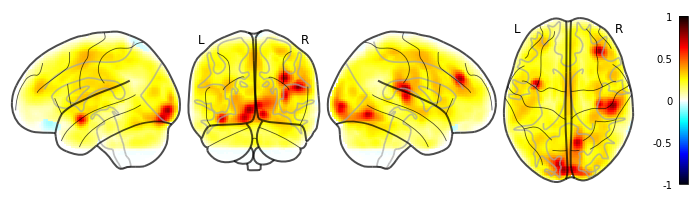

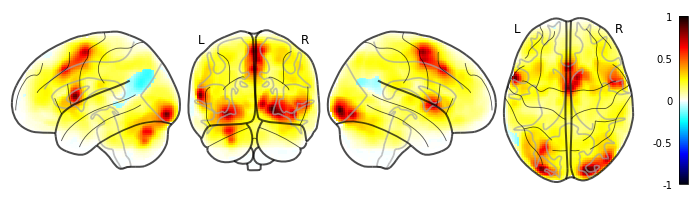

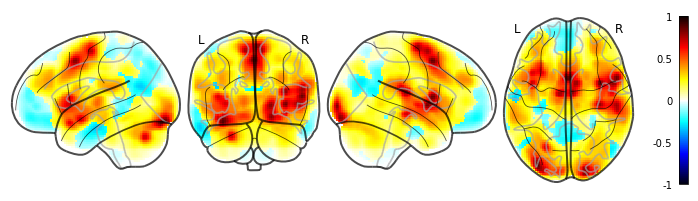

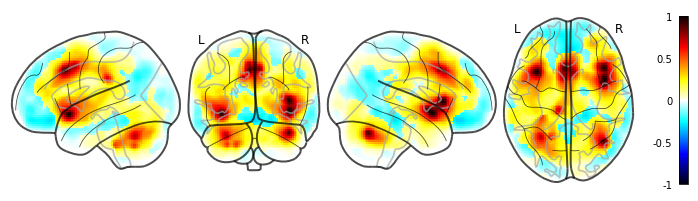

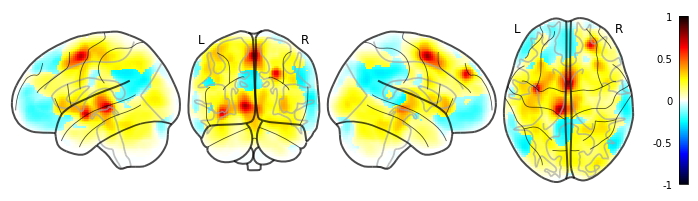

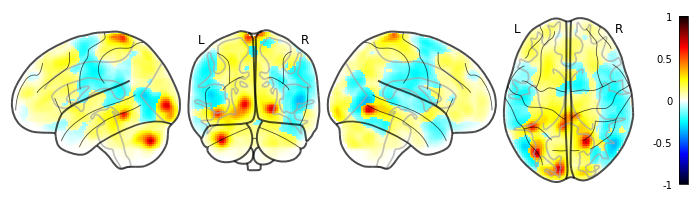

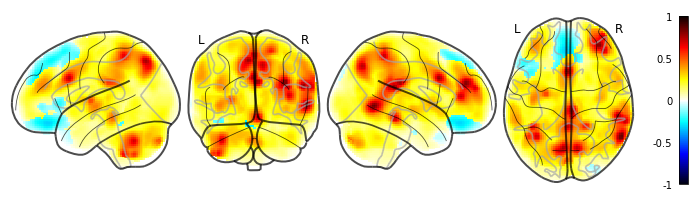

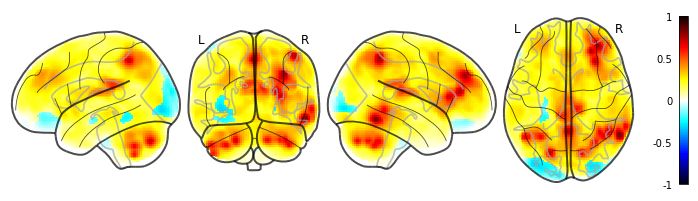

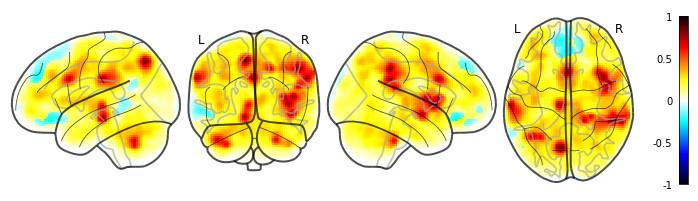

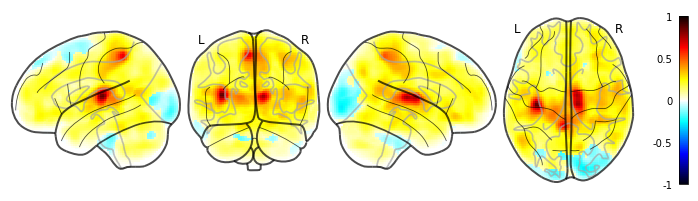

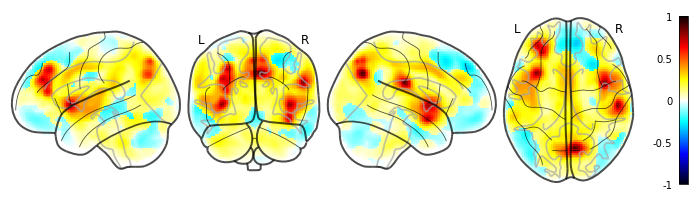

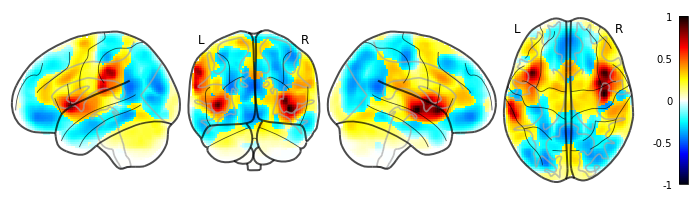

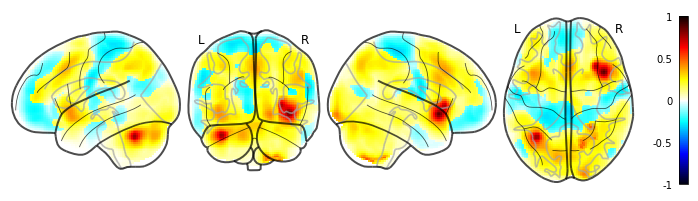

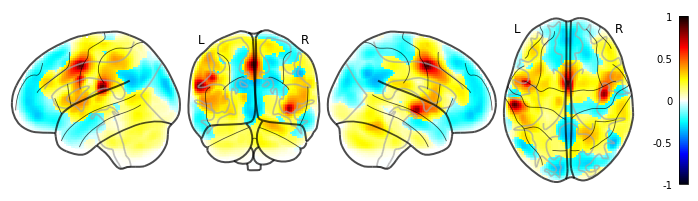

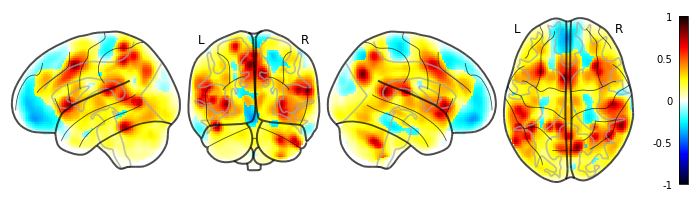

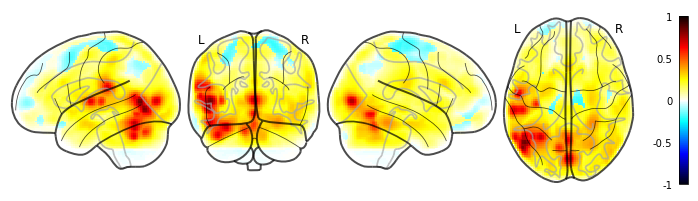

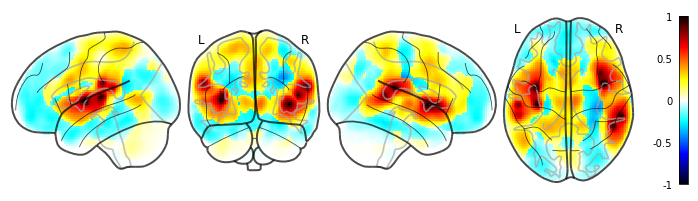

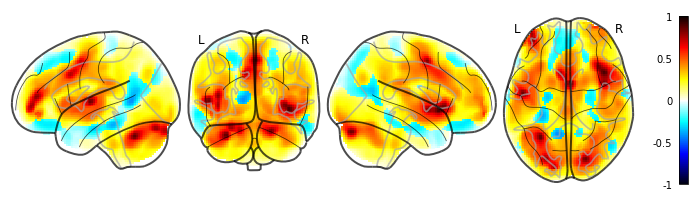

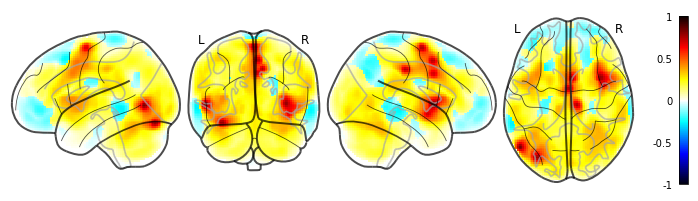

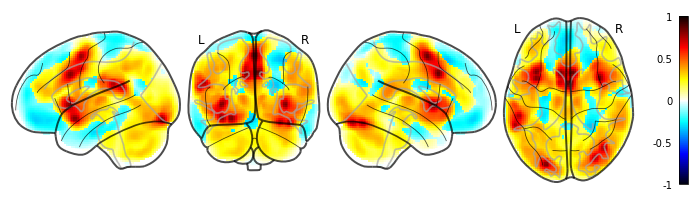

In [4]:
for img in imgs:
    display = plot_glass_brain(img, display_mode='lyrz',
                               plot_abs=False, colorbar=True,
                               vmax=1, threshold=0)

In [ ]:
k.

## Preparing example Dataset

In [ ]:
dset_dict = {}
coords_df = pd.read_csv('example_data/coordinates.csv')
for i, row in pd.read_csv('example_data/studies.csv').iterrows():
    this_study_coords = coords_df[coords_df['study_id'] == row[0]]
    contrast = {"metadata": {"sample_sizes": [row[1]]},
                "coords": { "space": this_study_coords['space'].unique()[0],
                            "x": list(this_study_coords['x']),
                            "y": list(this_study_coords['y']),
                            "z": list(this_study_coords['z'])}}
    dset_dict[row[0]] = {"contrasts": {"1": contrast }}

with open("example_data/tmp.json", 'w') as fp:
    json.dump(dset_dict, fp)

In [ ]:
dset = nimare.dataset.Dataset("example_data/tmp.json")
mask_img = dset.masker.mask_img

## Transforming from peak coordinates to maps using peaks2maps model

In [ ]:
k = nimare.meta.cbma.kernel.Peaks2MapsKernel()
imgs = k.transform(dset, masked=True)

## Plotting the results

In [ ]:
for img in imgs:
    display = plot_glass_brain(img, display_mode='lyrz',
                               plot_abs=False, colorbar=True,
                               vmax=1, threshold=0)